In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset on city


In [2]:
merged_data = pd.merge(ride_data_df, city_data_df, on="city")
# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
grouped_city = merged_data.groupby("city").mean()
rides_by_city = merged_data["city"].value_counts()
city_rides_df = rides_by_city.rename_axis('city').reset_index(name="Rides")
avg_fare_by_city_df = pd.merge(grouped_city, city_rides_df, on="city")
avg_fare_by_city_df.head()


,city,fare,ride_id,driver_count,Rides
0,Amandaburgh,24.641667,5.359336e+12,12.0,18
1,Barajasview,25.332273,4.676968e+12,26.0,22
2,Barronchester,36.422500,4.460796e+12,11.0,16
3,Bethanyland,32.956111,5.842550e+12,22.0,18
4,Bradshawfurt,40.064000,3.735294e+12,7.0,10


In [4]:
# Make sure there is a city type assigned to each city
no_repeat_city_df = merged_data.drop_duplicates(subset='city', keep="first")
no_repeat_city_df.head()
dropped_no_repeat_city = no_repeat_city_df.drop(['fare', 'date', 'ride_id', 'driver_count'], axis=1)
dropped_no_repeat_city.head()
city_type_df = pd.merge(dropped_no_repeat_city, avg_fare_by_city_df, on="city")
city_type_df.head()

,city,type,fare,ride_id,driver_count,Rides
0,Lake Jonathanshire,Urban,23.425833,4.709922e+12,5.0,24
1,South Michelleport,Urban,24.451613,4.727560e+12,72.0,31
2,Port Samanthamouth,Urban,25.642800,4.418397e+12,57.0,25
3,Rodneyfort,Urban,28.616957,4.973479e+12,34.0,23
4,South Jack,Urban,22.965263,4.892221e+12,46.0,19


In [5]:
# Obtain the x and y coordinates for each of the three city types
# Urban plot
urban_df = city_type_df.loc[city_type_df["type"] == "Urban", :]
urban_x = urban_df["Rides"]
urban_y = urban_df["fare"]

In [6]:
#Suburban x and y coordinates
suburban_df = city_type_df.loc[city_type_df["type"] == "Suburban", :]
suburban_x = suburban_df["Rides"]
suburban_y = suburban_df["fare"]

In [7]:
# Rural x and y coordinates
rural_df = city_type_df.loc[city_type_df["type"] == "Rural", :]
rural_x = rural_df["Rides"]
rural_y = rural_df["fare"]

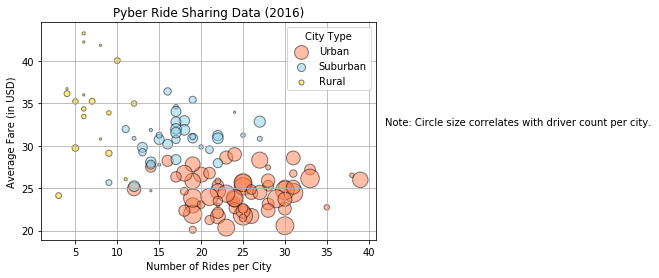

In [24]:
# Variables for bubble size off driver_count
z_bub_urban = urban_df['driver_count']
z_bub_suburban = suburban_df['driver_count']
z_bub_rural = rural_df['driver_count']

# Plotting the scatter on the same chart
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(urban_x, urban_y, z_bub_urban*5, facecolors="coral", edgecolors="black", alpha=0.5, label = 'Urban')
ax1.scatter(suburban_x, suburban_y, z_bub_suburban*5, facecolors="skyblue", edgecolors="black", alpha=0.5, label = 'Suburban')
ax1.scatter(rural_x, rural_y, z_bub_rural*5, facecolors="gold", edgecolors="black", alpha=0.5, label = 'Rural')


# Graph Formatting
# Title and Labels
ax1.set_title("Pyber Ride Sharing Data (2016)")
ax1.set_xlabel("Number of Rides per City")
ax1.set_ylabel("Average Fare (in USD)")
# Legend, Gridlines, Text Note
plt.legend(title='City Type', loc='upper right')
ax1.grid()
ax1.text(42, 32.5, "Note: Circle size correlates with driver count per city.")
# Save Image
plt.savefig("Images/PyberBubblePlot.png")


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [9]:
total_urban_df = merged_data.loc[merged_data["type"] == "Urban", :]
total_suburban_df = merged_data.loc[merged_data['type'] == "Suburban"]
total_rural_df = merged_data.loc[merged_data['type'] == "Rural"]

In [10]:
# Calculate Type Percents
# Get df with all fares by city type


# Total Fares for all city types
total_fare = merged_data['fare'].sum()

# Total fares by city type
total_urban_fare = total_urban_df['fare'].sum()
percent_urban_fare = total_urban_fare / total_fare

total_suburban_fare = total_suburban_df['fare'].sum()
percent_suburban_fare = total_suburban_fare / total_fare

total_rural_fare = total_rural_df['fare'].sum()
percent_rural_fare = total_rural_fare / total_fare

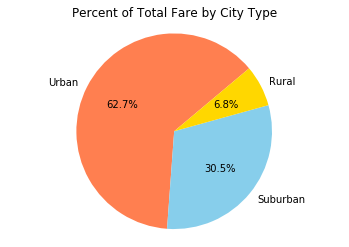

In [25]:
# Build Pie Chart
fare_percents = [percent_urban_fare,percent_suburban_fare,percent_rural_fare]
type_labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "skyblue", "gold"]
plt.pie(fare_percents, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40)
# Formatting
plt.title("Percent of Total Fare by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show
# # Save Figure
plt.savefig("Images/FareByCity.png")

In [ ]:
# Show Figure
plt.show() 

## Total Rides by City Type

In [20]:
# Calculate Ride Percents
# Find total number of Urban, Rural, Suburban rides
total_rides = merged_data["ride_id"].count()
total_urban_rides = total_urban_df['ride_id'].count()
total_suburban_rides = total_suburban_df['ride_id'].count()
total_rural_rides = total_rural_df['ride_id'].count()
# Percent of Rides by Types
percent_urban_rides = total_urban_rides / total_rides
percent_suburban_rides = total_suburban_rides / total_rides
percent_rural_rides = total_rural_rides / total_rides



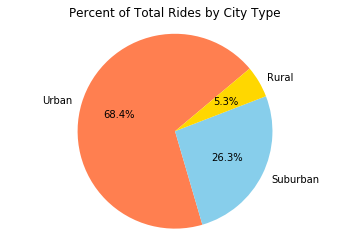

In [26]:
# Build Pie Chart
ride_percents = [percent_urban_rides,percent_suburban_rides,percent_rural_rides]
type_labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "skyblue", "gold"]
plt.pie(ride_percents, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40)

plt.axis("equal")
plt.title("Percent of Total Rides by City Type")
# Save Figure
plt.savefig("Images/RidesByCity.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Number of Drivers per City Type
urban_drivers = urban_df["driver_count"].sum()
suburban_drivers = suburban_df['driver_count'].sum()
rural_drivers = rural_df['driver_count'].sum()
total_drivers = urban_drivers + suburban_drivers + rural_drivers
# Calculate Percentages of Drivers by City
percent_urban_drivers = urban_drivers / total_drivers
percent_suburban_drivers = suburban_drivers / total_drivers
percent_rural_drivers = rural_drivers / total_drivers


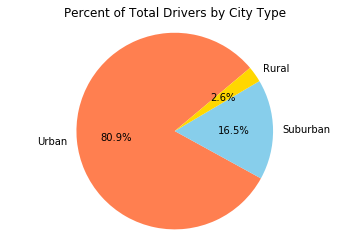

In [27]:
# Build Pie Chart
driver_percents = [percent_urban_drivers,percent_suburban_drivers,percent_rural_drivers]
type_labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "skyblue", "gold"]
plt.pie(driver_percents, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40)

plt.axis("equal")
plt.title("Percent of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/DriversByCity.png")

In [ ]:
# Show Figure
plt.show()